In [12]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv("/home/tuandinh/Desktop/MachineLearning/Kmeans in ML/movie_metadata.csv")
print(df.shape)
print(df.head())

(5043, 28)
   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1    

In [26]:
print(df['title_year'])

0       2009.0
1       2007.0
2       2015.0
3       2012.0
4          NaN
         ...  
5038    2013.0
5039       NaN
5040    2013.0
5041    2012.0
5042    2004.0
Name: title_year, Length: 5043, dtype: float64


#### **Only keep the numeric columns for our analysis.**

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [ ]:
df.drop(df.index[19730],inplace=True)
df.drop(df.index[29502],inplace=True)
df.drop(df.index[35585],inplace=True)

In [27]:
df_numeric = df[['director_facebook_likes','actor_3_facebook_likes','num_critic_for_reviews','duration','gross','budget','num_user_for_reviews', 'title_year']]
df_numeric.head()

,director_facebook_likes,actor_3_facebook_likes,num_critic_for_reviews,duration,gross,budget,num_user_for_reviews,title_year
0,0.0,855.0,723.0,178.0,760505847.0,237000000.0,3054.0,2009.0
1,563.0,1000.0,302.0,169.0,309404152.0,300000000.0,1238.0,2007.0
2,0.0,161.0,602.0,148.0,200074175.0,245000000.0,994.0,2015.0
3,22000.0,23000.0,813.0,164.0,448130642.0,250000000.0,2701.0,2012.0
4,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

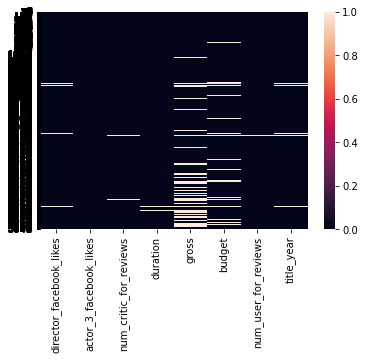

In [28]:
# Check missing value
sns.heatmap(df_numeric.isnull(), yticklabels=True)

In [29]:
df_numeric.isnull().sum()

director_facebook_likes    104
actor_3_facebook_likes      23
num_critic_for_reviews      50
duration                    15
gross                      884
budget                     492
num_user_for_reviews        21
title_year                 108
dtype: int64

In [33]:
## Handing missing values
features = ['director_facebook_likes','actor_3_facebook_likes','num_critic_for_reviews','duration','gross','budget','num_user_for_reviews', 'title_year']
for feature in features:
    df_numeric[feature] = df_numeric[feature].fillna(df_numeric[feature].mean())

/tmp/ipykernel_180687/758178492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric[feature] = df_numeric[feature].fillna(df_numeric[feature].mean())


In [34]:
df_numeric.isnull().sum()

director_facebook_likes    0
actor_3_facebook_likes     0
num_critic_for_reviews     0
duration                   0
gross                      0
budget                     0
num_user_for_reviews       0
title_year                 0
dtype: int64

In [35]:
from sklearn import preprocessing
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_numeric.drop('title_year',axis=1))
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_numeric.index, columns=df_numeric.columns[:-1])
df_numeric_scaled.head()

,director_facebook_likes,actor_3_facebook_likes,num_critic_for_reviews,duration,gross,budget,num_user_for_reviews
0,0.000000,0.037174,0.889163,0.339286,1.000000,0.019402,0.603479
1,0.024478,0.043478,0.370690,0.321429,0.406840,0.024559,0.244515
2,0.000000,0.007000,0.740148,0.279762,0.263080,0.020056,0.196284
3,0.956522,1.000000,1.000000,0.311508,0.589253,0.020466,0.533702
4,0.005696,0.028044,0.171422,0.198812,0.063732,0.003254,0.053720


In [36]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

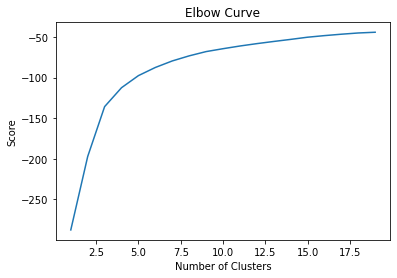

In [37]:
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()